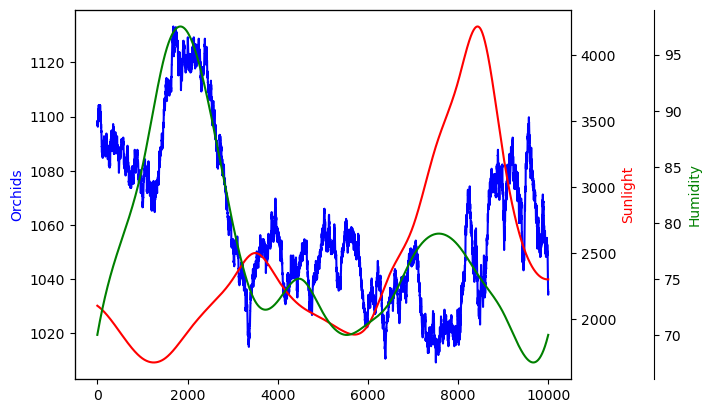

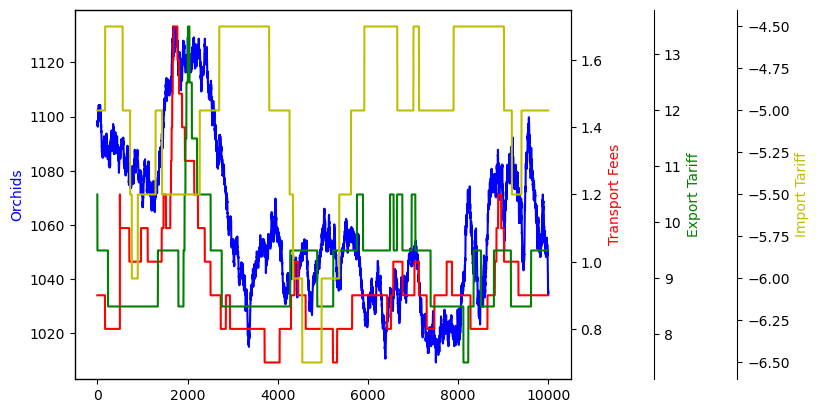

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('../data/round2/1.csv', delimiter=';')
l = 1
df = df.loc[:len(df) // (1 / l)]
df.head()


fig, ax1 = plt.subplots()

# Plot and label the primary y-axis
ax1.plot(df['ORCHIDS'], color='b')
ax1.set_ylabel('Orchids', color='b')

# Create the first secondary y-axis and plot
ax2 = ax1.twinx()
ax2.plot(df['SUNLIGHT'], color='r')
ax2.set_ylabel('Sunlight', color='r')

# Create a second secondary y-axis, plot, and shift it to the left
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift the third y-axis further right
ax3.plot(df['HUMIDITY'], color='g')
ax3.set_ylabel('Humidity', color='g')

plt.show()

fig, ax1 = plt.subplots()

# Primary y-axis
ax1.plot(df['ORCHIDS'], color='b', label='Orchids')
ax1.set_ylabel('Orchids', color='b')
# ax1.legend(loc='upper left')

# First secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df['TRANSPORT_FEES'], color='r', label='Transport Fees')
ax2.set_ylabel('Transport Fees', color='r')
# ax2.legend(loc='upper right')

# Second secondary y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift it outward
ax3.plot(df['EXPORT_TARIFF'], color='g', label='Export Tariff')
ax3.set_ylabel('Export Tariff', color='g')
# ax3.legend(loc='lower right')

# Third secondary y-axis
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))  # Further shift it outward
ax4.plot(df['IMPORT_TARIFF'], color='y', label='Import Tariff')
ax4.set_ylabel('Import Tariff', color='y')
# ax4.legend(loc='lower left')

plt.show()


In [128]:
# df[['ORCHIDS']]
df[['SUNLIGHT', 'HUMIDITY']][:-1]

,SUNLIGHT,HUMIDITY
0,4500.0000,95.000000
1,4500.0356,94.995990
2,4500.0700,94.991980
3,4500.1016,94.987970
4,4500.1313,94.983950
...,...,...
9995,1704.4551,64.986400
9996,1703.5710,64.989100
9997,1702.6835,64.991806
9998,1701.7925,64.994530


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
model = LinearRegression()


# model = MLPRegressor(hidden_layer_sizes=(12,24,24,12), verbose=True,  random_state=1, max_iter=500)
# shift = 5
res = []
score = []
shift = 1
X1 = df[['SUNLIGHT', 'HUMIDITY']][:-shift]
X2 = (df['SUNLIGHT'] * df['HUMIDITY'])[:-shift]
X3 = (df['SUNLIGHT'] ** 2)[:-shift]
X4 = (df['HUMIDITY'] ** 2)[:-shift]
X6 = df['ORCHIDS'][:-shift]

X5 = np.maximum(abs(df['HUMIDITY'] - 80), abs(df['HUMIDITY'] - 60))[:-shift]

X = pd.concat([X1, X2, X5], axis=1)
# X = X1
# print(df)
Y = df['ORCHIDS'].to_numpy()[shift:]
model = model.fit(X.to_numpy(), Y)
res.append(model.coef_[-1])
score.append(model.score(X.to_numpy(), Y))
model.score(X.to_numpy(), Y)
model.score(X.to_numpy(), Y)

0.7126175516260307

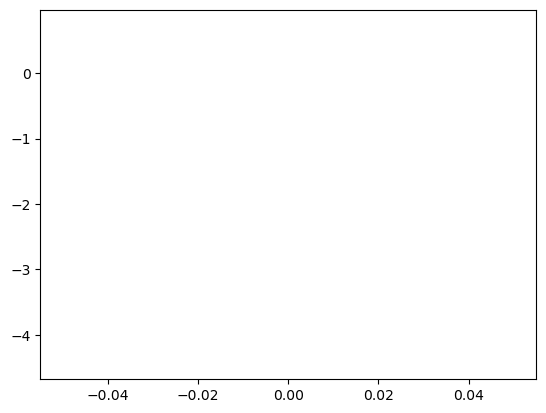

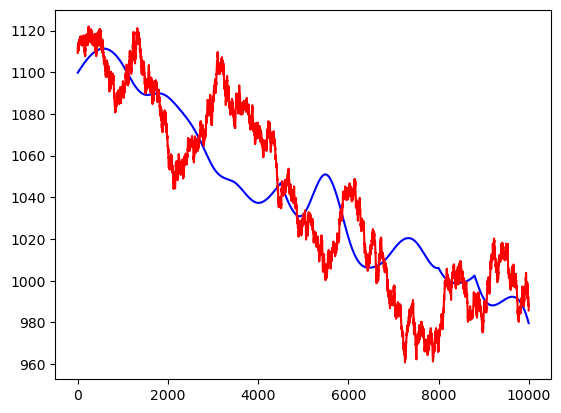

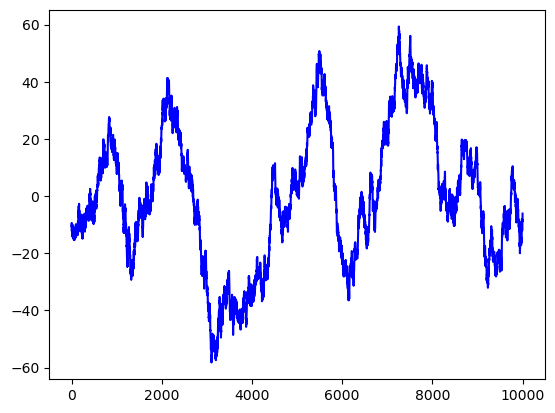

In [16]:
plt.plot(res)
plt.plot(score)
plt.show()

plt.plot(model.predict(X.to_numpy()) , color='b')
# Xi =  (df['ORCHIDS']) - df['ORCHIDS'].mean()
plt.plot(Y, color='r')
plt.show()

plt.plot(model.predict(X.to_numpy()) -Y, color='b')
plt.show()

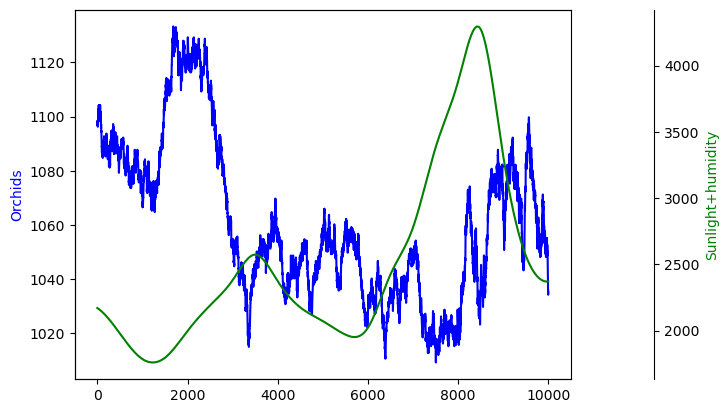

In [24]:
fig, ax1 = plt.subplots()

# Plot and label the primary y-axis
ax1.plot(df['ORCHIDS'], color='b')
ax1.set_ylabel('Orchids', color='b')


# Create a second secondary y-axis, plot, and shift it to the left
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Shift the third y-axis further right
ax3.plot(df['HUMIDITY']+ df['SUNLIGHT'], color='g')
ax3.set_ylabel('Sunlight+humidity', color='g')

plt.show()

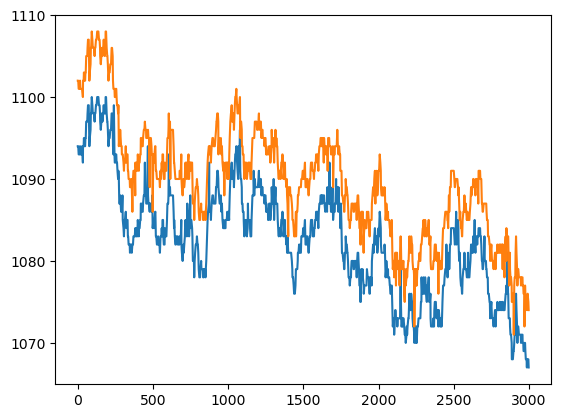

In [18]:
df_price = pd.read_csv('../data/round2/2.csv', delimiter=';')
df_price = df_price[df_price['product'] == 'ORCHIDS']
# df['total_ask'] = df['ask_price_1'] + df['']
plt.plot(df_price['bid_price_1'])
plt.plot(df_price['ask_price_1'])

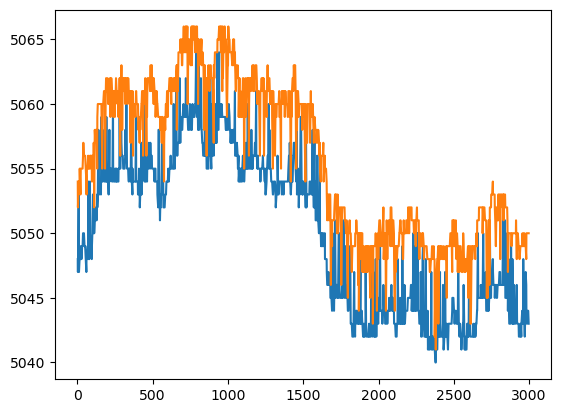

In [16]:

df_price = pd.read_csv('../data/round2/2.csv', delimiter=';')
df_price = df_price[df_price['product'] == 'STARFRUIT']
plt.plot(df_price['bid_price_1'])
plt.plot(df_price['ask_price_1'])

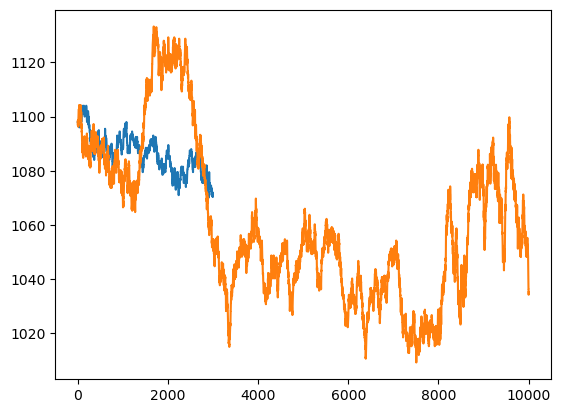

In [15]:
df_2 = pd.read_csv('../data/round2/2.csv', delimiter=';')
df_2 = df_2[df_2['product'] == 'ORCHIDS']
plt.plot(df_2['mid_price'])
plt.plot(df['ORCHIDS'])

# Info
Sunlight < 7 hours -> prod 4% for every 10 minutes


60 < Humidity < 80 -> prod 2% for every 5% points